In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
all_evals = np.load('../experiments/evals_by_depth/hessian_full_evals_dict.npy', allow_pickle=True)
all_evals = all_evals.reshape(-1)[0]

In [30]:
model_defs_list = []
for x in list(all_evals.keys()):
    key_str = np.array(x.split('/')[-1].split('_'))
    
    if key_str[0] == '0':
        tokeep = [1, 6, 8, -1]
        replace_epoch = True
    else:
        tokeep = [0, 5, 7, -1]
        replace_epoch = False
    
    kept_str = key_str[tokeep]
    
    if replace_epoch:
        kept_str[-2] = '0'
    kept_str = np.hstack((kept_str, kept_str[1][9:]))
    #print(kept_str[1][9:])
    model_defs_list.append(kept_str)

model_defs = np.stack(model_defs_list)

In [31]:
eigs_list = []
for x in list(all_evals.items()):
    eigs_list.append(x[1])
#eigs = np.stack(eigs_list)

In [32]:
def eff_dim(x, s = 10.):
    return np.sum(x[x!=1] / (x[x!=1.] + s))

Text(0.5, 1.0, 'Effective Dimension over Training')

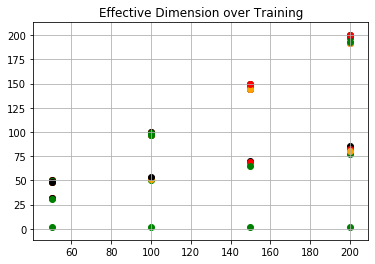

In [33]:
colors = ['blue', 'green', 'orange', 'red', 'black']
models = np.array([8, 56, 83, 110, 164])

for i in range(len(eigs_list)):
    depth = float(model_defs[i, -1])
    col = np.where(models == depth)[0][0]
    if depth > 8:
        current_eff_dim = eff_dim(eigs_list[i][0])
        plt.scatter(float(model_defs[i, 3]), current_eff_dim, 
                    color = colors[col])

plt.grid()
plt.title('Effective Dimension over Training')

Text(0.5, 0, 'Depth')

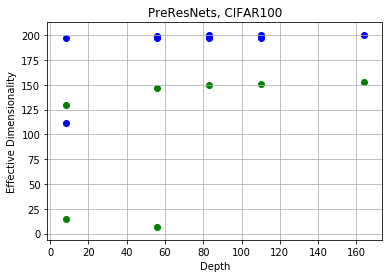

In [43]:
colors = ['blue', 'green', 'orange', 'red', 'black']
#models = np.array([8, 56, 83, 110, 164])

for i in range(len(eigs_list)):
    depth = int(model_defs[i, -1])
    
    col = np.where(models == depth)[0][0]
    
    if float(model_defs[i, 3]) == 200:
        current_eff_dim = eff_dim(eigs_list[i][0], s = 1.)
        plt.scatter(depth, current_eff_dim, color = colors[model_defs[i,0]=='fisher'])

plt.grid()
plt.title('PreResNets, CIFAR100')
plt.ylabel('Effective Dimensionality')
plt.xlabel('Depth')

In [10]:
import subprocess

In [11]:
test_losses = []
for dd in models:
    current_str = "grep \'^Test\' ../experiments/evals_by_depth/logs/baseline_CIFAR100_PreResNet"+str(dd)+ \
                    "_SEED_0.txt"

    output = subprocess.check_output(current_str, shell=True).decode("utf-8") 
    test_loss = [float(o.split(' ')[2]) for o in output.split('\n')[:-1]][180]
    test_losses.append(test_loss)

Text(0.5, 0, 'Depth')

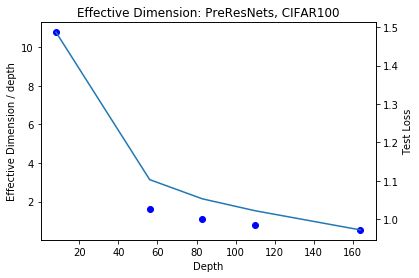

In [13]:
fig, ax = plt.subplots()

colors = ['blue', 'green', 'orange', 'red', 'black']
#models = np.array([8, 56, 83, 110, 164])

for i in range(len(eigs_list)):
    depth = float(model_defs[i, -1])
    col = np.where(models == depth)[0][0]
    if float(model_defs[i, 3]) == 180:
        current_eff_dim = eff_dim(eigs_list[i][0], s = 10.)
        ax.scatter(depth, current_eff_dim / depth, color = 'blue')

ax.set_ylabel('Effective Dimension / depth')
ax2 = ax.twinx()
ax2.plot(models, test_losses)
ax2.set_ylabel('Test Loss')
plt.title('Effective Dimension: PreResNets, CIFAR100')
ax.set_xlabel('Depth')

In [15]:
all_evals = np.load('../experiments/evals_by_depth/cifar10_full_evals_dict.npy', allow_pickle=True)
all_evals = all_evals.reshape(-1)[0]

In [16]:
all_evals

{'/Users/shuat/Documents/wesley/results/fisher_CIFAR10_BS_16_MODEL_PreResNet110_EPOCHS_200_SEED_0_NSTEP_100': [array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
         1.00000000e+00, 4.64861235e-03, 8.13910440e-02, 1.81226179e-01,
         3.05056155e-01, 4.48156446e-01, 5.94911158e-01, 7.67835617e-01,
         9.51200902e-01, 1.13528085e+00, 1.33779645e+00, 1.54797196e+00,
         1.79639399e+00, 2.03173590e+00, 2.26485133e+00, 2.54174280e+00,
         2.84013700e+00, 3.10125494e+00, 3.43451476e+00, 3.72931004e+00,
         4.03621483e+00, 4.40871811e+00, 4.76052189e+00, 5.04672289e+00,
         5.45594358e+00, 5.77165365e+00, 6.11300802e+00, 6.52570391e+00,
         6.93971920e+00, 7.35553980e+00, 7.73592520e+00, 8.21863651e+00,
         8.51928425e+00, 8.91843891e+00, 9.44393730e+00, 9.84355259e+00,
         1.03399935e+01, 1.06834288e+01, 1.08569994e+01, 1.15745611e+01,
         1.18793755e+01, 1.22331314e+01, 1.26058121e+01, 1.30071278e+01,
         1.3446